In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
NUM_DRAWS = 100000000
DECK_SIZE = 52
SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
EXPECTED_FREQ = NUM_DRAWS / DECK_SIZE

In [9]:
# Create a standard deck of cards
deck = [rank + ' of ' + suit for suit in SUITS for rank in RANKS]

# Function to draw cards with replacement
def draw_cards(num_draws):
    draws = np.random.choice(deck, size=num_draws, replace=True)
    return draws

# Draw cards
draws = draw_cards(NUM_DRAWS)

In [10]:
# Calculate observed frequencies
observed_counts = Counter(draws)
observed_freqs = np.array([observed_counts[card] for card in deck])

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(f_obs=observed_freqs, f_exp=np.full(DECK_SIZE, EXPECTED_FREQ))

In [11]:
# Calculate mean and standard deviation of card values
card_values = {rank: i+2 for i, rank in enumerate(RANKS)}
draw_values = [card_values[card.split()[0]] for card in draws]
mean_value = np.mean(draw_values)
std_dev_value = np.std(draw_values)

In [12]:
# Display results
print(f"Chi-square statistic: {chi_square_stat:.2f}")
print(f"P-value: {p_value:.2f}")

Chi-square statistic: 43.41
P-value: 0.77


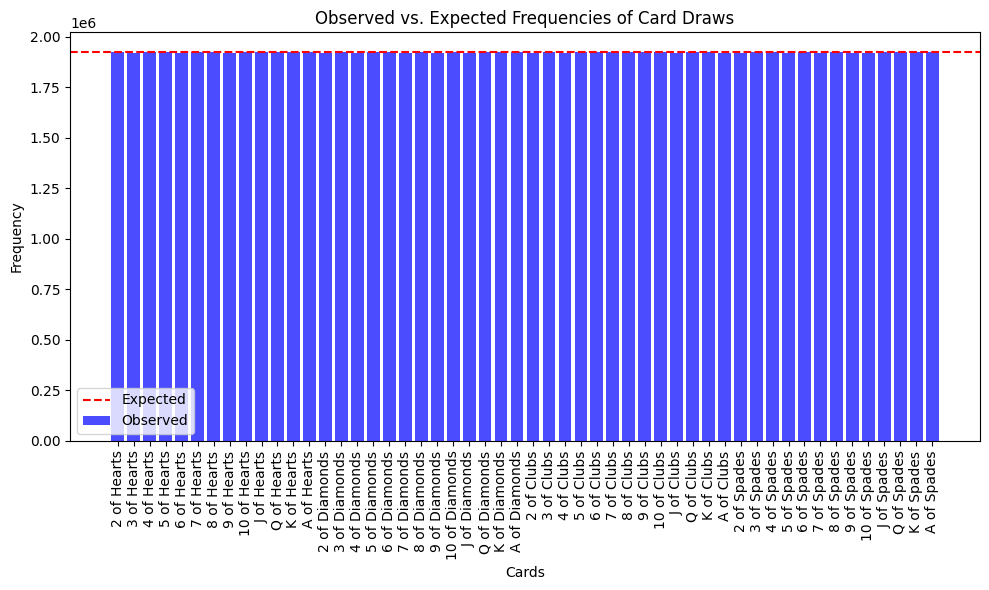

In [13]:
# Plot observed vs. expected frequencies
plt.figure(figsize=(10, 6))
plt.bar(deck, observed_freqs, color='blue', alpha=0.7, label='Observed')
plt.axhline(y=EXPECTED_FREQ, color='red', linestyle='--', label='Expected')
plt.xlabel('Cards')
plt.ylabel('Frequency')
plt.title('Observed vs. Expected Frequencies of Card Draws')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Chi-squared statistic: 127.11
P-value: 0.0000000195
Potential duplicated card: A of Spades


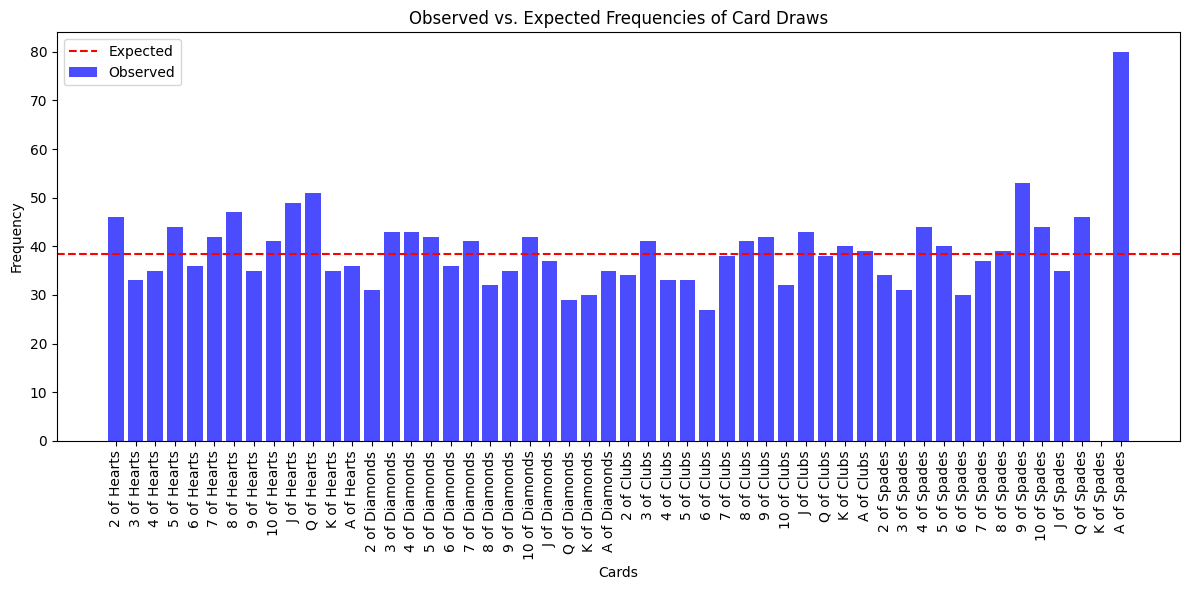

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter

# Constants
NUM_DRAWS = 2000 # Reduced number of draws for demonstration
DECK_SIZE = 52
SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
EXPECTED_FREQ_STANDARD = NUM_DRAWS / DECK_SIZE

# Create a standard deck of cards
deck = [rank + ' of ' + suit for suit in SUITS for rank in RANKS]

# Create a modified deck (for demonstration, let's modify it here)
modified_deck = deck[:]
modified_deck.remove('K of Spades')
modified_deck.append('A of Spades')

# Function to draw cards with replacement
def draw_cards(deck, num_draws):
    draws = np.random.choice(deck, size=num_draws, replace=True)
    return draws

# Draw cards from the modified deck
draws_modified = draw_cards(modified_deck, NUM_DRAWS)

# Calculate observed frequencies
observed_counts = Counter(draws_modified)
observed_freqs = np.array([observed_counts[card] for card in deck])

# Chi-squared test
def chi_squared_test(observed, expected):
    chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    return chi2_stat, p_value

# Perform the Chi-squared test
chi2_stat, p_value = chi_squared_test(observed_freqs, np.full(DECK_SIZE, EXPECTED_FREQ_STANDARD))

# Identify potential duplicated card
deviation = observed_freqs - EXPECTED_FREQ_STANDARD
potential_duplicated_card = deck[np.argmax(deviation)]

# Display results
print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.10f}")
print(f"Potential duplicated card: {potential_duplicated_card}")

# Plot observed vs. expected frequencies
plt.figure(figsize=(12, 6))
plt.bar(deck, observed_freqs, color='blue', alpha=0.7, label='Observed')
plt.axhline(y=EXPECTED_FREQ_STANDARD, color='red', linestyle='--', label='Expected')
plt.xlabel('Cards')
plt.ylabel('Frequency')
plt.title('Observed vs. Expected Frequencies of Card Draws')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()